In [1]:
import sys  
sys.path.insert(0, '/Users/franci/MasterThesis/multiomics-perturbation/new_model')

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Training scenario 3

In [2]:
from src_trainer.plotting import boxplot_grouped_corr, average_corr_mean_condition
import seaborn as sns

ct_list = ['B', 'CD4T', 'CD8T', 'DC', 'Monocyte']

sample_dist_list = ["posterior", "prior", "transfer"]
col_conds = [{'PG': None, 'ADJ': 'medium', 'CT': None},
             {'PG': None, 'ADJ': 'PI', 'CT': None}]

folder_name = 'csv_3_protein'

def average_corr_mean(folder, model_type, model_name, sample_dist_list, score = "corr_mean", modality="protein"):
    """
    Calculates average correlation mean per sample distribution 
    :param filename: 
    :return: 
    """
    for sample_dist in sample_dist_list:
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        avg = np.mean(df[score])
        print("Average for {}: {}".format(sample_dist, np.round(avg,2)))
        

def all_boxplot_posterior_PS(cat_cov_model_dict, modality, label_models, score, title):
    data_list = []
    for cat_cov, model_dict in cat_cov_model_dict.items():
        print(model_dict)
        for i, (model_type, model_name) in enumerate(model_dict.items()):
            df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_3_protein', model_type, model_name, 'posterior', modality))
            idx_list = []
            df["CAT_COV"] = cat_cov
            df["model_type"] = label_models[i]
            data_list.append(df[["CAT_COV", score, "model_type"]])
            
    dataframe = pd.concat(data_list)

    fig = plt.figure()
    sns.boxplot(y=score, x='CAT_COV',
                data=dataframe,
                palette="colorblind",
                hue='model_type')
    plt.title(title)
    plt.show()
    

def boxplot_posterior_PS(model_type_dict, modality, label_models, score, title):
    labels = []
    data_list = []
    for i, (model_type, model_name) in enumerate(model_type_dict.items()):
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format('csv_3_protein', model_type, model_name, 'posterior', modality))
        idx_list = []
        labels.append(label_models[i])
        data_list.append(df[score])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(data_list, labels=labels)
    plt.title(title)
    plt.show()

Global seed set to 0


## Categorical covariates: ADJ, CT

In [22]:
model_type_dict = {
                   "TOTALVI": "20220613-114743", 
                   "MMVAE": "20220613-120653",
                  }

In [23]:
for d in col_conds:
    for ct in ct_list:
        d['CT'] = ct
        print("Correlation mean")
        boxplot_grouped_corr(model_type_dict,
                             sample_dist_list,
                             d,
                             score="corr_mean",
                             folder = folder_name)
        print("Correlation variance")
        boxplot_grouped_corr(model_type_dict,
                             sample_dist_list,
                             d,
                             score="corr_var",
                             folder = folder_name)
    

Correlation mean


FileNotFoundError: [Errno 2] No such file or directory: '../results/csv_3_protein/TOTALVI_20220613-114743_posterior_RNA.csv'

## Excluded population RT

In [47]:
model_type_dict = {
                   "TOTALVI": "20220614-124622", 
                   "MMVAE": "20220617-134247",
                  }

Correlation mean


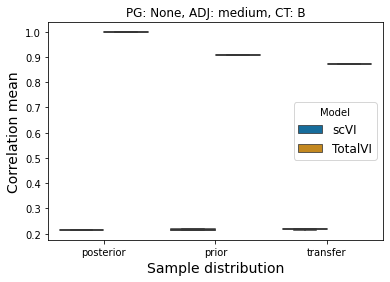

{'TOTALVI_posterior': 0.21566666666666667, 'TOTALVI_prior': 0.21633333333333335, 'TOTALVI_transfer': 0.21766666666666667, 'MMVAE_posterior': 0.9979999999999999, 'MMVAE_prior': 0.908, 'MMVAE_transfer': 0.8716666666666666}
Correlation mean


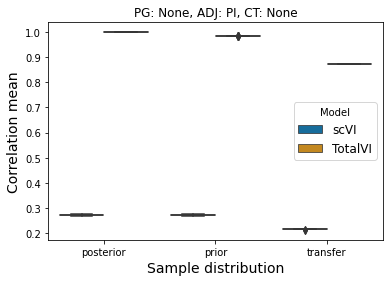

{'TOTALVI_posterior': 0.27320833333333333, 'TOTALVI_prior': 0.273125, 'TOTALVI_transfer': 0.2161666666666667, 'MMVAE_posterior': 0.9985833333333334, 'MMVAE_prior': 0.985125, 'MMVAE_transfer': 0.8715833333333333}


In [48]:
for d in col_conds:
    print("Correlation mean")
    dataframe, mean_list, std_dict = boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name,
                        modality = 'protein')
    print(mean_list)
    """
    print("Correlation variance")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = folder_name)
    """
    

## Excluded population group LD

In [49]:
model_type_dict = {
                   "TOTALVI": "20220616-202804", 
                   "MMVAE": "20220616-204959",
                  }

Correlation mean


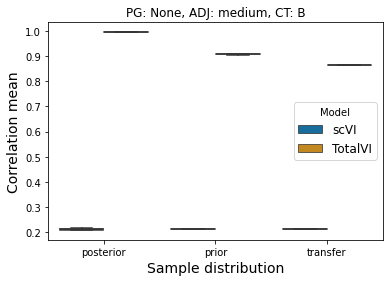

{'TOTALVI_posterior': 0.211, 'TOTALVI_prior': 0.21133333333333335, 'TOTALVI_transfer': 0.211, 'MMVAE_posterior': 0.9953333333333334, 'MMVAE_prior': 0.9090000000000001, 'MMVAE_transfer': 0.866}
Correlation mean


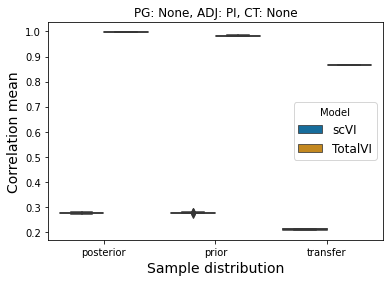

{'TOTALVI_posterior': 0.275375, 'TOTALVI_prior': 0.276, 'TOTALVI_transfer': 0.2101666666666667, 'MMVAE_posterior': 0.997, 'MMVAE_prior': 0.983375, 'MMVAE_transfer': 0.8656666666666667}


In [50]:
for d in col_conds:
    print("Correlation mean")
    dataframe, mean_list, std_dict = boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name,
                        modality = 'protein')
    print(mean_list)
    """
    print("Correlation variance")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = folder_name)
    """
    

## Excluded population group: DK

In [51]:
model_type_dict = {
                   "TOTALVI": "20220616-202944", 
                   "MMVAE": "20220616-204854",
                  }

Correlation mean


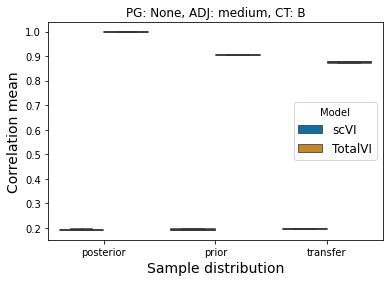

{'TOTALVI_posterior': 0.19299999999999998, 'TOTALVI_prior': 0.19366666666666665, 'TOTALVI_transfer': 0.19533333333333336, 'MMVAE_posterior': 0.997, 'MMVAE_prior': 0.9049999999999999, 'MMVAE_transfer': 0.8736666666666667}
Correlation mean


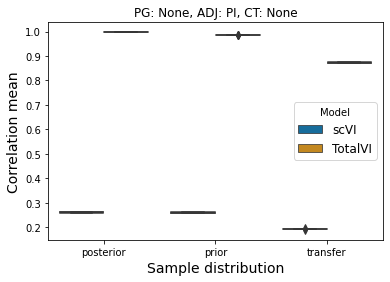

{'TOTALVI_posterior': 0.261625, 'TOTALVI_prior': 0.26175, 'TOTALVI_transfer': 0.19329166666666667, 'MMVAE_posterior': 0.997, 'MMVAE_prior': 0.9847916666666666, 'MMVAE_transfer': 0.8734999999999999}


In [52]:
for d in col_conds:
    print("Correlation mean")
    dataframe, mean_list, std_dict = boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_mean",
                         folder = folder_name,
                        modality = 'protein')
    print(mean_list)
    """
    print("Correlation variance")
    boxplot_grouped_corr(model_type_dict,
                         sample_dist_list,
                         d,
                         score="corr_var",
                         folder = folder_name)
    """

## Thesis figure 

Boxplot for results of prior and transfer predictive sampling for MMVI. 


In [9]:
def boxplot_MMVI(label_dict,
                 sample_dist,
                 score = 'corr_mean',
                 folder = 'csv_3_protein', 
                 model_type = 'MMVAE',
                 modality = 'protein',
                 jitter = False,
                 y_lim = [-0.1,1]
                ):
    labels = []
    data_list = []
    data_list_snb = []
    for i, (pop_group, model_name) in enumerate(label_dict.items()):
        df = pd.read_csv('../results/{}/{}_{}_{}_{}.csv'.format(folder, model_type, model_name, sample_dist, modality))
        idx_list = []
        idx_list.append(set(np.where([df['PG'] == pop_group])[1]))
        labels.append(pop_group)
        bool_idx = list(set.intersection(*map(set, idx_list)))
        data_list.append(df.iloc[bool_idx, :][score])
        data_list_snb.append(df.iloc[bool_idx, :][[score, 'PG', 'ADJ']])
        
    dataframe = pd.concat(data_list_snb)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    if jitter: 
        ax = sns.swarmplot(y=score, x='PG',
                data=dataframe,
                palette="colorblind",
                hue = 'ADJ',
                size=10, marker="D", edgecolor="gray", alpha = 0.5)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3, fontsize=14)
        
    else:
        ax.boxplot(data_list, labels=labels)
    ax.set_ylabel("Correlation mean", fontsize=16)
    ax.set_xlabel("Excluded population group", fontsize=16)
    ax.set_ylim(y_lim)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    
    plt.style.use('seaborn-whitegrid')
    plt.show()

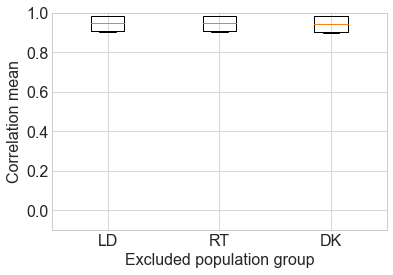

In [10]:
label_dict = {"LD": "20220616-204959",
              "RT": "20220617-134247",
              "DK": "20220616-204854"}

boxplot_MMVI(label_dict, 'prior')

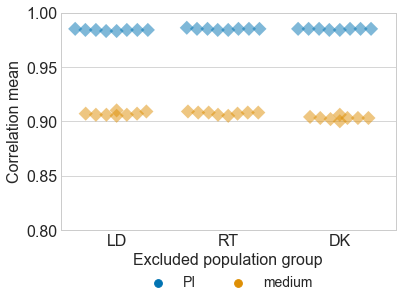

In [11]:
boxplot_MMVI(label_dict, 'prior', jitter = True, y_lim = [0.8,1])

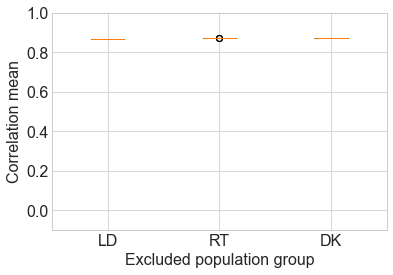

In [12]:
label_dict = {"LD": "20220616-204959",
              "RT": "20220617-134247",
              "DK": "20220616-204854"}

boxplot_MMVI(label_dict, 'transfer')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


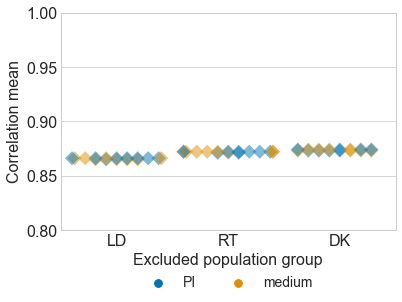

In [13]:
boxplot_MMVI(label_dict, 'transfer', jitter = True, y_lim = [0.8,1])